In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Essential Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [4]:
# Import the ready dataset

data = pd.read_csv('Final_Data.csv')
data.head()

Date  Natural Gas Price  Crude Oil Price  US Dollar Index       GDP  \
0  1995-01-01              1.354            18.39            87.99  7455.288   
1  1995-02-01              1.483            18.49            85.93  7455.288   
2  1995-03-01              1.685            19.17            81.90  7455.288   
3  1995-04-01              1.662            20.38            81.80  7522.289   
4  1995-05-01              1.718            18.89            82.57  7522.289   

   Natural Gas Production  Net Imports  Natural Gas Consumption  \
0                15.60033      2.08822                 15.14350   
1                16.03862      2.06435                 17.48263   
2                16.63964      2.27778                 21.19285   
3                15.98615      2.39700                 24.32305   
4                14.25792      2.22862                 22.30289   

   US total natural gas proved reserves (trillion cubic feet)  
0                                            173.476           
1                                            173.476           
2                                            173.476           
3                                            173.476           
4                                            173.476

In [5]:
data.shape

(336, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date                                                        336 non-null    object 
 1   Natural Gas Price                                           336 non-null    float64
 2   Crude Oil Price                                             336 non-null    float64
 3   US Dollar Index                                             336 non-null    float64
 4   GDP                                                         336 non-null    float64
 5   Natural Gas Production                                      336 non-null    float64
 6   Net Imports                                                 336 non-null    float64
 7   Natural Gas Consumption                                     336 non-null    float64
 8   U

In [7]:
# Find out missing value
data.isna().sum().any()

False

In [8]:
# Find the description of dataset
data.describe().T

count          mean  \
Natural Gas Price                                   336.0      4.174705   
Crude Oil Price                                     336.0     54.928631   
US Dollar Index                                     336.0     91.858542   
GDP                                                 336.0  14776.915643   
Natural Gas Production                              336.0     19.333847   
Net Imports                                         336.0      1.403211   
Natural Gas Consumption                             336.0     20.798504   
US total natural gas proved reserves (trillion ...  336.0    283.489179   

                                                            std         min  \
Natural Gas Price                                      2.246457     1.35400   
Crude Oil Price                                       29.038824    11.22000   
US Dollar Index                                       10.764399    71.80000   
GDP                                                 4708.665517  7455.28800   
Natural Gas Production                                 4.631961    13.36065   
Net Imports                                            1.865775    -3.83564   
Natural Gas Consumption                                4.591074    13.68369   
US total natural gas proved reserves (trillion ...   106.961030   172.44300   

                                                             25%          50%  \
Natural Gas Price                                       2.600500      3.49150   
Crude Oil Price                                        27.420000     51.75500   
US Dollar Index                                        82.877500     91.99500   
GDP                                                 10645.098750  14629.72800   
Natural Gas Production                                 15.824315     16.83143   
Net Imports                                             0.698033      2.23051   
Natural Gas Consumption                                16.830562     20.04289   
US total natural gas proved reserves (trillion ...    191.743000    247.78900   

                                                             75%          max  
Natural Gas Price                                       5.075250     13.92100  
Crude Oil Price                                        75.972500    140.00000  
US Dollar Index                                        98.460000    120.24000  
GDP                                                 18313.239750  25723.94100  
Natural Gas Production                                 22.186467     30.75377  
Net Imports                                             2.750675      3.64664  
Natural Gas Consumption                                23.575962     35.94499  
US total natural gas proved reserves (trillion ...    348.809000    504.50100

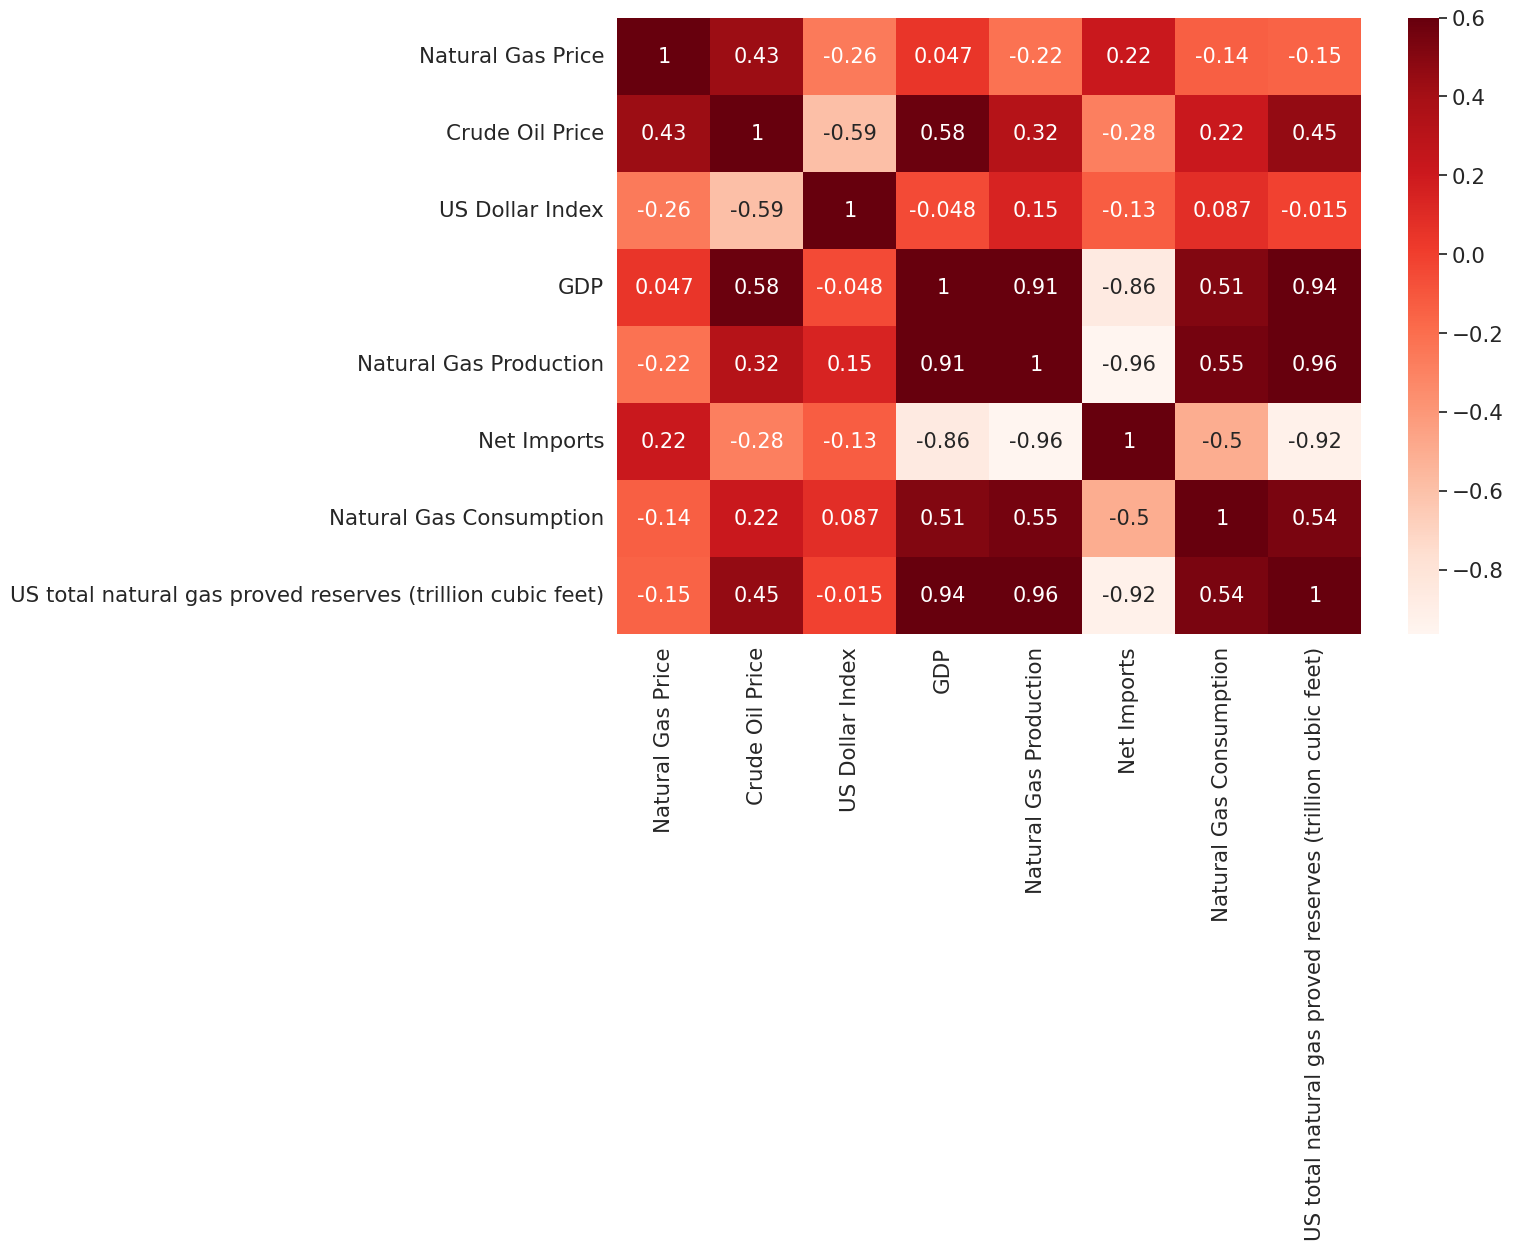

In [9]:
# Calculates the relationship between each column in your data set
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(data.corr(),annot=True,cmap='Reds',annot_kws={'size':15},vmax=0.6)
plt.show()

## Find out the relationship between Natural Gas Price, Crude Oil Price, US Dollar Price.

<Figure size 2400x1600 with 0 Axes>

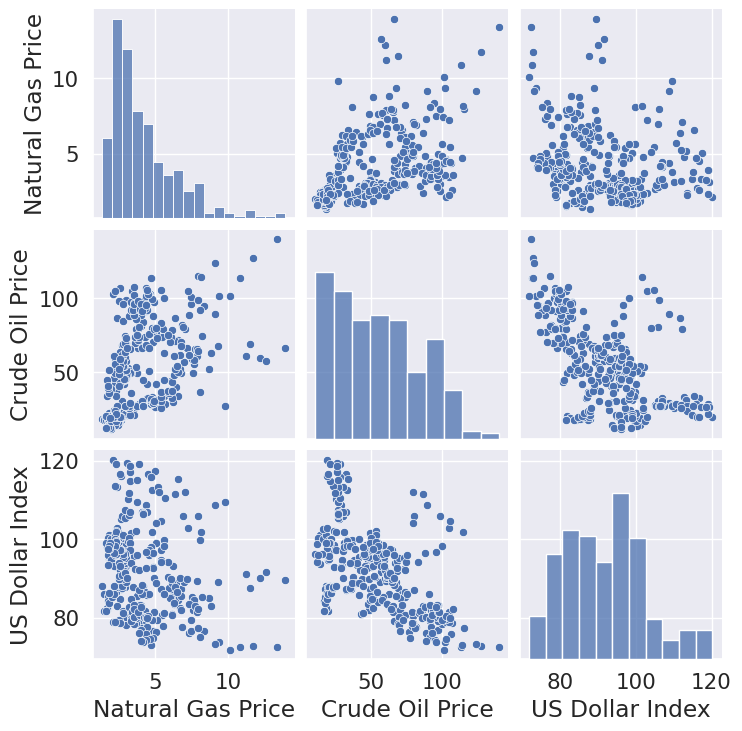

In [10]:
plt.figure(figsize=(12,8),dpi=200)
sns.set(font_scale=1.4)
sns.pairplot(data[['Natural Gas Price', 'Crude Oil Price', 'US Dollar Index']])
plt.show()

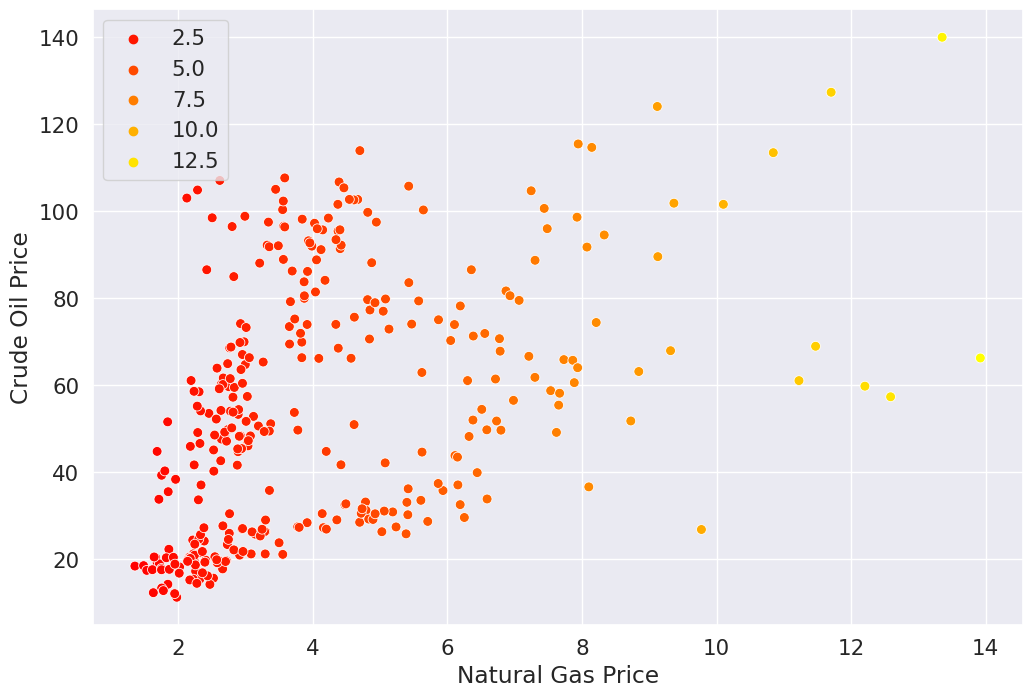

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Natural Gas Price',y='Crude Oil Price',data=data,s=50,hue='Natural Gas Price',palette='autumn')
plt.legend(loc='best')

# Modeling 

In [12]:
data = data.drop('Date',axis=1)

In [13]:
# Perform standard scaler for dataset convrt between 0-1.
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale)
data_scale.columns = data.columns
data_scale

Natural Gas Price  Crude Oil Price  US Dollar Index       GDP  \
0            -1.257497        -1.260145        -0.359919 -1.557245   
1            -1.199987        -1.256696        -0.551576 -1.557245   
2            -1.109934        -1.233244        -0.926517 -1.557245   
3            -1.120188        -1.191514        -0.935820 -1.542995   
4            -1.095222        -1.242901        -0.864182 -1.542995   
..                 ...              ...              ...       ...   
331           2.207779         1.194022         1.580841  2.227208   
332           1.288520         0.847073         1.885073  2.227208   
333           0.971996         1.089869         1.831111  2.328335   
334           1.228336         0.883975         1.303589  2.328335   
335           0.403143         0.858109         1.135192  2.328335   

     Natural Gas Production  Net Imports  Natural Gas Consumption  \
0                 -0.807236     0.367692                -1.233576   
1                 -0.712472     0.354880                -0.723321   
2                 -0.582523     0.469442                 0.086022   
3                 -0.723817     0.533436                 0.768840   
4                 -1.097483     0.443055                 0.328165   
..                      ...          ...                      ...   
331                2.371240    -2.812056                 0.359915   
332                2.209201    -2.480611                 0.534611   
333                2.424379    -2.360520                 1.127559   
334                2.469139    -2.466054                 1.049419   
335                2.300724    -2.321228                 0.495298   

     US total natural gas proved reserves (trillion cubic feet)  
0                                            -1.030069           
1                                            -1.030069           
2                                            -1.030069           
3                                            -1.030069           
4                                            -1.030069           
..                                                 ...           
331                                           1.777085           
332                                           1.777085           
333                                           1.777085           
334                                           1.777085           
335                                           1.777085           

[336 rows x 8 columns]

# Split the dataset

In [14]:
x = data_scale.drop('Natural Gas Price',axis=1)
y = data_scale['Natural Gas Price']

# Split the dataset between train and test

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=41)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(268, 7) (68, 7) (268,) (68,)


# XGBRegressor Algorithm

In [16]:
xgb_model = XGBRegressor(n_estimators=1000,max_depth=6)
xgb_model.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [17]:
xgb_pred = xgb_model.predict(xtest)

In [18]:
print('Mean Asolute Error',mean_absolute_error(xgb_pred,ytest))
print('Mean Squared Error',mean_squared_error(xgb_pred,ytest))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(xgb_pred,ytest)))

Mean Asolute Error 0.26764133567206977
Mean Squared Error 0.14983301870434637
Root Mean Squared Error 0.3870827026674615


# Grid Search CV

In [19]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

xgb = XGBRegressor()

In [20]:
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=hyperparameter_grid,
                           cv=5, 
                           scoring = 'neg_mean_absolute_error',n_jobs = 4,
                           verbose = 5, 
                           return_train_score = True)

In [21]:
grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits
[CV 2/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=100;, score=(train=-0.263, test=-0.306) total time=   0.1s
[CV 2/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=500;, score=(train=-0.132, test=-0.264) total time=   0.4s
[CV 1/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=900;, score=(train=-0.078, test=-0.325) total time=   0.7s
[CV 5/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=900;, score=(train=-0.078, test=-0.331) total time=   0.7s
[CV 4/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=1100;, score=(train=-0.066, test=-0.296) total time=   0.8s
[CV 3/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=2,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=4,
             param_grid={'base_score': [0.25, 0.5, 0.75, 1],
                         'booster': ['gbtree', 'gblinear']

In [22]:
# Find the best paramter
grid_search.best_params_

{'base_score': 1,
 'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500}

In [23]:
xgb_model_grid = XGBRegressor(base_score = 1,
                              booster = 'gbtree',
                              learning_rate = 0.1,
                              max_depth = 5,
                              min_child_weight = 1,
                              n_estimators = 500)

xgb_model_grid.fit(xtrain,ytrain) 

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [24]:
predictions = xgb_model_grid.predict(xtest)

In [25]:
print('Mean Asolute Error',mean_absolute_error(predictions,ytest))
print('Mean Squared Error',mean_squared_error(predictions,ytest))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(predictions,ytest)))

Mean Asolute Error 0.2751898341968172
Mean Squared Error 0.1557756166402877
Root Mean Squared Error 0.3946841986199697


# Perform the Modeling Performance

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Natural Gas Production'),
  Text(1, 0, 'Natural Gas Consumption'),
  Text(2, 0, 'US Dollar Index'),
  Text(3, 0, 'GDP'),
  Text(4, 0, 'Crude Oil Price'),
  Text(5, 0, 'Net Imports'),
  Text(6, 0, 'US total natural gas proved reserves (trillion cubic feet)')])

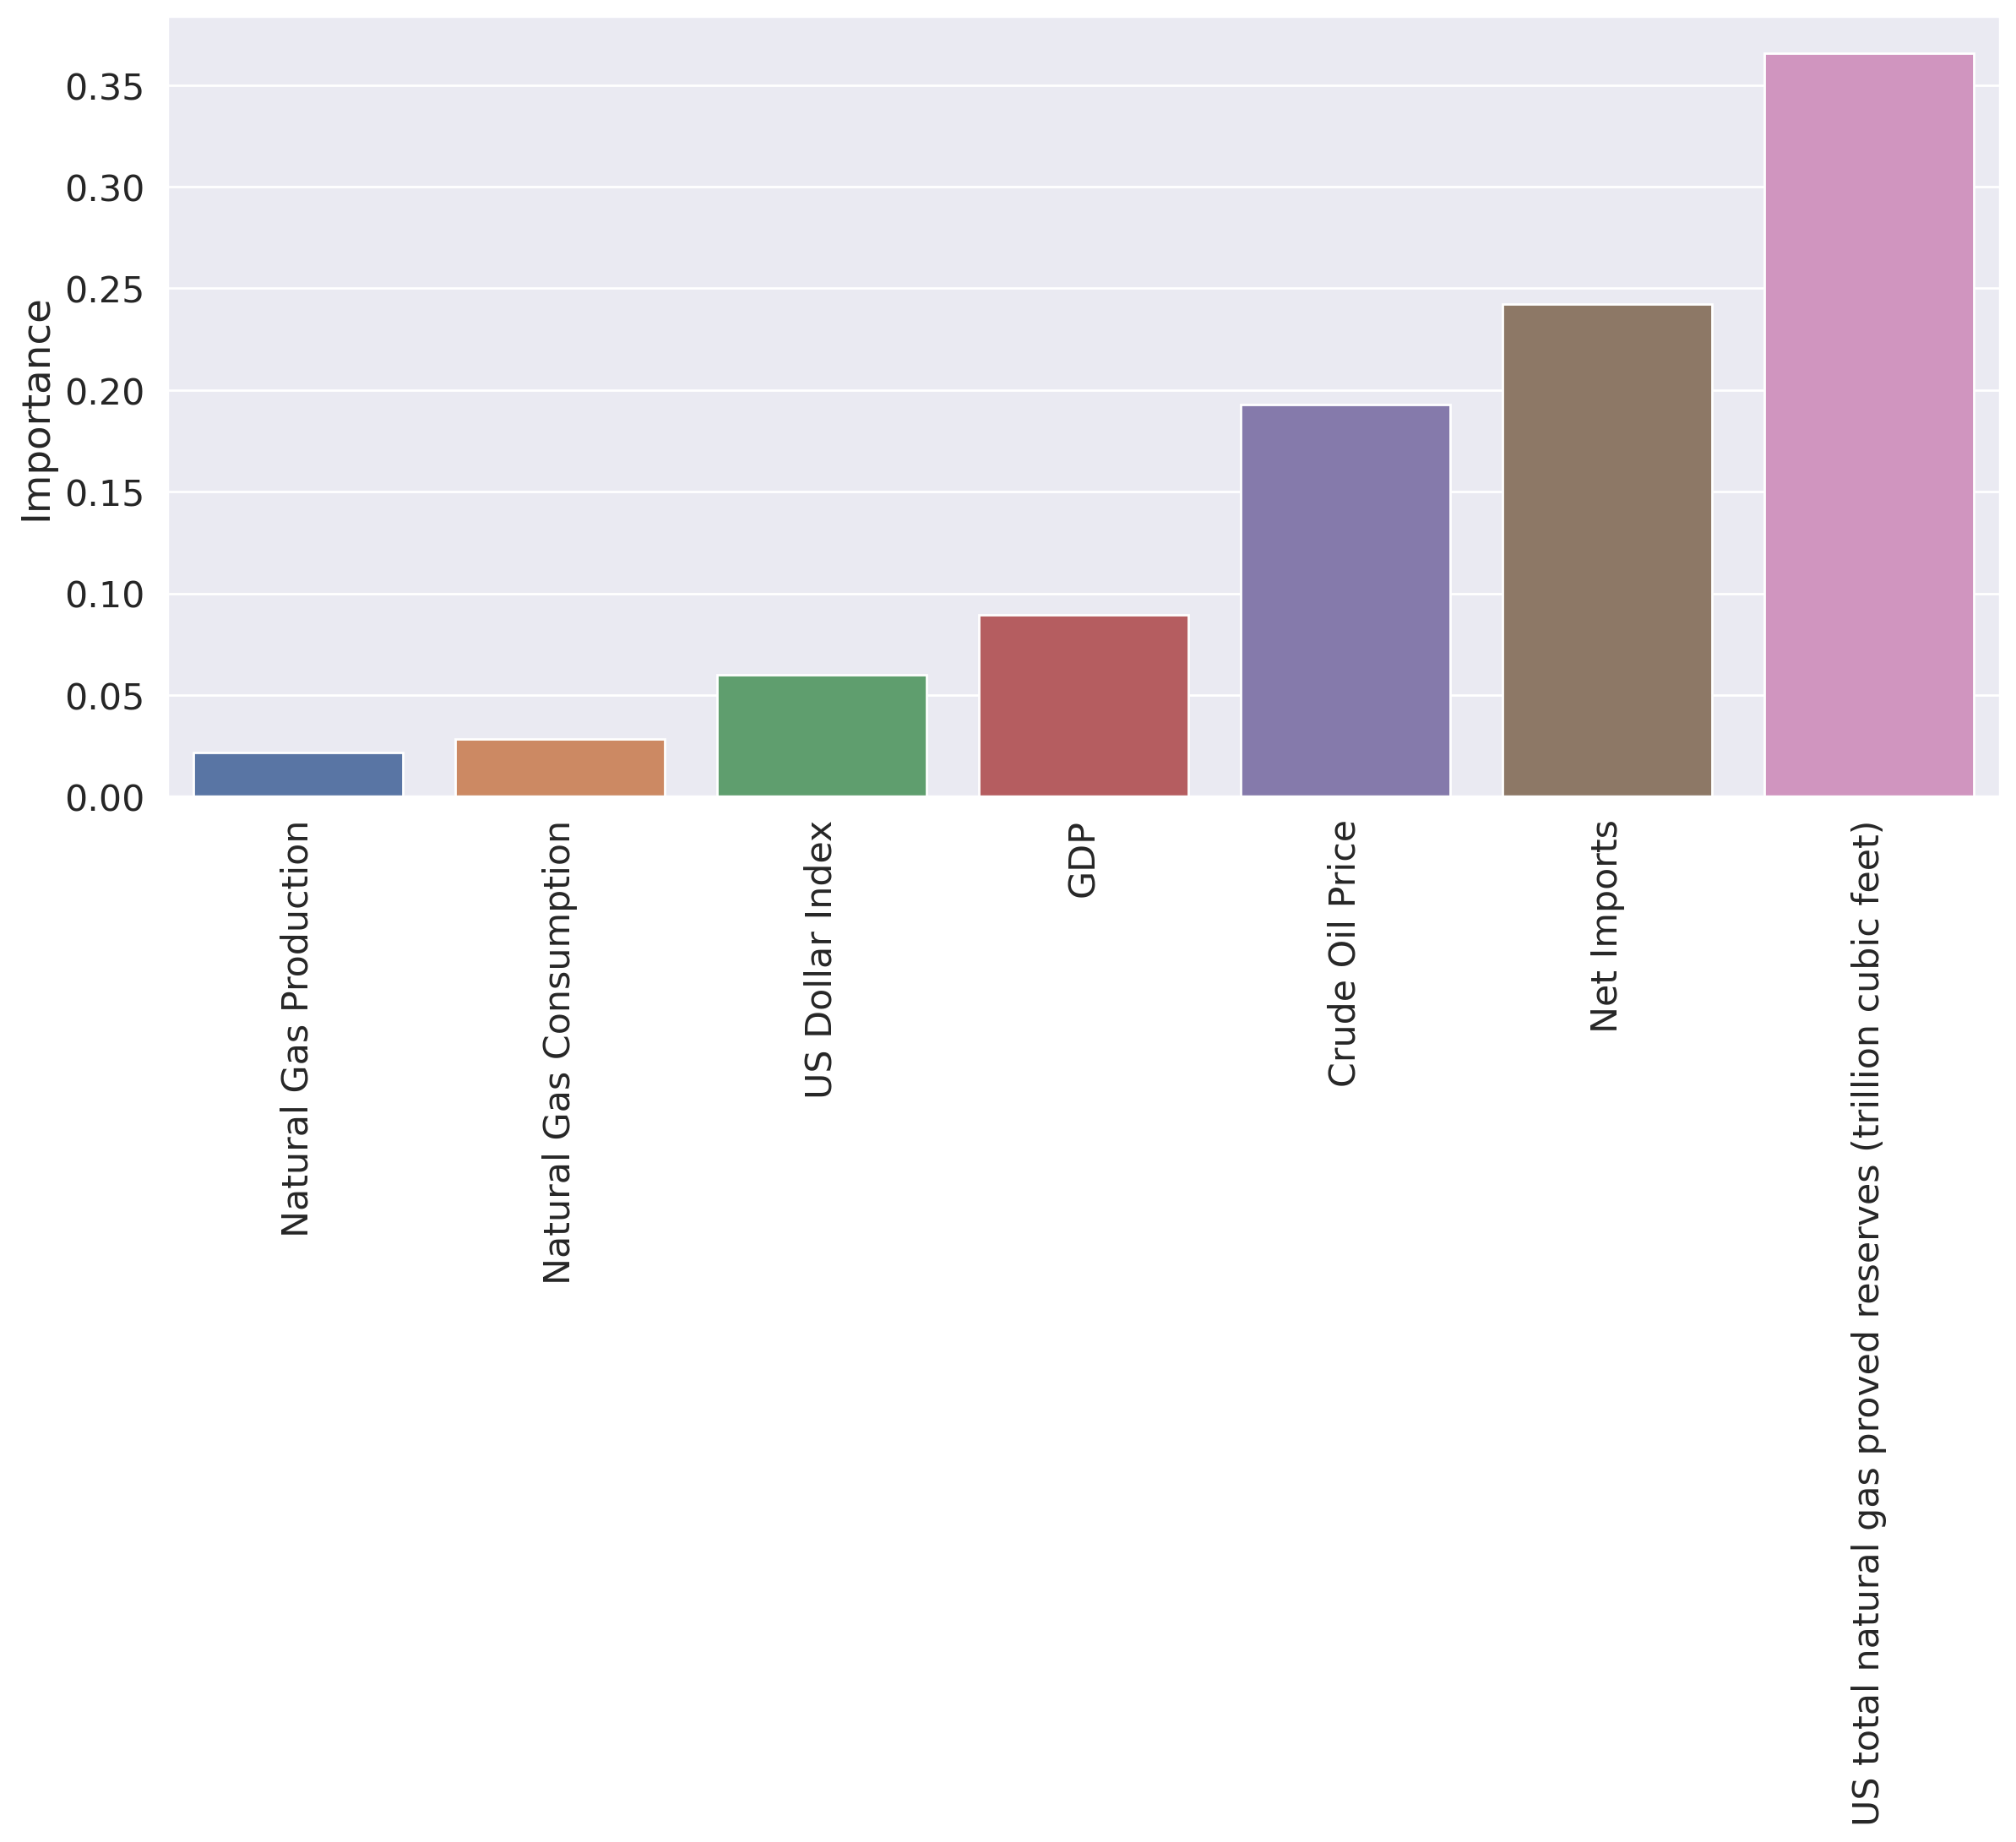

In [26]:
feat_import = grid_search.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=x.columns,data=feat_import,columns=['Importance'])
imp_feats = imp_feats.sort_values("Importance",ascending=False)
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)